# Data Science Salaries

En aquest treball treballem sobre 2 bases de dades sobre els salaris en la ciència de dades, $\textit{Data Science Salaries 2023}$ 💸 (son dades desde el 2020 fins al 2023) i $\textit{Data Science Job Salaries}$ (dades entre el 2020 i 2022). 

- https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

- https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Les dues bases de dades tenen els mateixos atributs. L'objectiu principal del treball és estudiar els atributs més importants per a millorar el sou com a analista de dades, i també, a partir de les dades inicials, construir un model de regressió per predir el salari d'un treballador. 

## Reading Data...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_name = 'ds_salaries'
df1 = pd.read_csv(f'data/{dataset_name}.csv')
df2 = pd.read_csv(f'data/{dataset_name}_2.csv')

In [3]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


El nostre problema de regressió tracta sobre predir el salari depenent les teves dades, com podem observar a la base de dades tenim 2 variables relacionades amb el sou, 'salary_in_usd' i 'salary', com 'salary_in_usd' és la variable respecte al salari global, eliminem 'salary' i canviem el nom de 'salary_in_usd' per comoditat.

In [139]:
# Eliminem atributs innecesaris
att_to_delete = ['salary']
df_1 = df1.drop(att_to_delete, axis=1)

att_to_delete_df2 = att_to_delete
att_to_delete_df2.append(df2.columns[0])
df_2 = df2.drop(att_to_delete_df2, axis=1)
# Concatenem els datasets
df = pd.concat([df_1, df_2], ignore_index=True)
df = df.rename(columns={'salary_in_usd':'salary'})
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
4357,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
4358,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
4359,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
4360,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


## Exploratory Data Analysis

### Quantitat i tipus d'atributs

Abans de res, anem a observar quants atributs tenim, el tipus, com el nombre de entrades...

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4362 non-null   int64 
 1   experience_level    4362 non-null   object
 2   employment_type     4362 non-null   object
 3   job_title           4362 non-null   object
 4   salary_currency     4362 non-null   object
 5   salary              4362 non-null   int64 
 6   employee_residence  4362 non-null   object
 7   remote_ratio        4362 non-null   int64 
 8   company_location    4362 non-null   object
 9   company_size        4362 non-null   object
dtypes: int64(3), object(7)
memory usage: 340.9+ KB


,work_year,salary,remote_ratio
count,4362.000000,4362.000000,4362.000000
mean,2022.238881,134053.558230,49.701972
std,0.768427,64797.957697,48.325818
min,2020.000000,2859.000000,0.000000
25%,2022.000000,90000.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,173000.000000,100.000000
max,2023.000000,600000.000000,100.000000


Podem observar que tenim 9 variables, de les quals 3 són numèriques i les altres 6 són objectes, més endavant farem un tractament de les variables no numèriques. També podem veure que tenim 4362 entrades. 

De les dades numèriques podem observar que els anys que tractarem en aquesta base de dades van desde el 2020 fins al 2023, ja que la mitjana d'anys es molt propera a 2022 podem intuir que la moltes de les entrades registrades seràn d'aquest any. 

La mijana del salari és de 134.053, del que podem intuir que es el salari anual, i ja que té una desviació de 64.797 indica una gran dispersió en els salaris, això es veu refelctat clarament en el salari mínim i màxim, 2.859 i 600.000 respectivament, indici de que pot ser que tinguem outliers a la base de dades.

Amb els percentils de la variable $\textit{remote\_ratio}$ podem observar que hi ha una polarització evident, ja que el percentil del 25% és 0 (treball presencial) i el del 75% és 100 (treball completament remot), això també pot ser degut a que aquesta variable pot ser no és una variable continua si no discreta.

### Detecció de NaNs i entrades duplicades

Ja podem observar que en les variables numèriques les dades no tindran NaNs, ja que com hem vist anteriorment tenim 4362 entrades, i amb la funció $\textit{.describe()}$ observem que el recompte de dades en aquestes variables és exactament 4362. Tot i això, no podem assegurar que a les dades categòriques succeïx el mateix, aleshores ho comprovem:

In [7]:
print("NaNs")
print(df.isna().sum())
print(f"Dades duplicades: {df.duplicated().sum()}")

NaNs
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Dades duplicades: 1694


Com no tenim cap Nan, no hem de fer cap tractament sobre aquests. Tot i això tenim 1694 dades repetides, les eliminem:

In [140]:
df.drop_duplicates(inplace=True)
print(f"Entrades duplicades eliminades, entrades final: {df.shape[0]}")

Entrades duplicades eliminades, entrades final: 2668


Un cop tenim les dades netes, observarem com es distrubueixen les variables, quins valors prenen les variables categòriques, el salari mig per a les diferents variables...

### Variables categòriques

Primer veiem els valors que poden prendre les variables categòriques i després farem un tractament a la variable $\textit{remote\_ratio}$ ja que intuïm que pot ser categòrica també:

In [9]:
categorical_vars = list(df.select_dtypes(include=['object']).columns)
for v in categorical_vars:
    print(f"{v}:")
    print(f"{len(df[v].unique())} valors diferents: {df[v].unique()[:10]} {'...' if len(df[v].unique()) > 10 else ''}\n")

experience_level:
4 valors diferents: ['SE' 'MI' 'EN' 'EX'] 

employment_type:
4 valors diferents: ['FT' 'CT' 'FL' 'PT'] 

job_title:
95 valors diferents: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer'] ...

salary_currency:
21 valors diferents: ['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS'] ...

employee_residence:
78 valors diferents: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL'] ...

company_location:
72 valors diferents: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH'] ...

company_size:
3 valors diferents: ['L' 'S' 'M'] 



In [10]:
variable = "remote_ratio"
print(df[variable].unique())
categorical_vars.append(variable)

[100   0  50]


Ja que les variables $\textit{experience\_level}$, $\textit{employment\_type}$ i $\textit{company\_size}$ tenen pocs atributs i poden portar a confussió i malentesos les reanomenarem, també farem el mateix amb $\textit{remote\_ratio}$, perquè finalment, com havíem intuït, no es tracta d'una variable numèrica, sinó categòrica: 
- 'company_size': 'S'->'Small', 'M'->'Medium', 'L'->'Large'
- 'remote_ratio': 100->'Online', 50->'Blended' (semipresencial), 0->'Face-to-face' (presencial)
- 'employment_type': 'FT'->'Full time', 'CT'->'Contractual', 'PT'->'Part time', 'FL'->'Freelancer'
- 'experience_level': 'SE'->'Senior', 'MI'->'Mid level', 'EN'->'Entry level', 'EX'->'Executve level'

In [141]:
df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium','L':'Large'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Online', 0:'Face-to-face', 50:'Blended'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full_time', 'CT':'Contractual','PT':'Part_time', 'FL':'Freelancer'})
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid_level', 'EN':'Entry_level', 'EX': 'Executive_level'})
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full_time,Principal Data Scientist,EUR,85847,ES,Online,ES,Large
1,2023,Mid_level,Contractual,ML Engineer,USD,30000,US,Online,US,Small
2,2023,Mid_level,Contractual,ML Engineer,USD,25500,US,Online,US,Small
3,2023,Senior,Full_time,Data Scientist,USD,175000,CA,Online,CA,Medium
4,2023,Senior,Full_time,Data Scientist,USD,120000,CA,Online,CA,Medium
...,...,...,...,...,...,...,...,...,...,...
4272,2022,Mid_level,Full_time,Data Engineer,EUR,68147,FR,Online,FR,Medium
4273,2022,Mid_level,Full_time,Data Scientist,CHF,122346,CH,Face-to-face,CH,Large
4275,2022,Mid_level,Full_time,Data Scientist,CAD,69336,CA,Online,CA,Medium
4322,2022,Mid_level,Full_time,Data Analyst,GBP,65438,GB,Face-to-face,GB,Medium


 ### Distribució de les variables

Un cop hem canviat el nom d'alguns atributs i les nostres dades són més clares, anem a veure com es distribueixen les variables:

In [12]:
def distribucio_variable(var, data = df, max_index=15, reverse = False):
    if len(data[var].unique()) > max_index:
        counts_var = data[var].value_counts().head(max_index)
    else:
        counts_var = data[var].value_counts()
    print(counts_var) 
    if reverse == False:
        sns.barplot(x=counts_var.index, y=counts_var.values,palette='gnuplot')
        plt.xlabel('Values')
        plt.ylabel('Counts')

    else:
        sns.barplot(x=counts_var.values, y=counts_var.index,palette='gnuplot')
        plt.xlabel('Counts')
        plt.ylabel('Values')
    plt.title(f"Distribution {var}")
    plt.show()

Les variables on passarem $\textbf{reverse = True}$ seran les variables on poden prendre molts valors:

In [13]:
categorical_vars_reverse = ["job_title", "employee_residence", "company_location"]
categorical_vars_non_reverse = [v for v in categorical_vars if v not in categorical_vars_reverse]

Distribució de variables categòriques:

job_title
Data Engineer                 623
Data Scientist                555
Data Analyst                  404
Machine Learning Engineer     214
Analytics Engineer             91
Research Scientist             67
Data Architect                 64
Data Science Manager           52
ML Engineer                    35
Research Engineer              33
Applied Scientist              31
Machine Learning Scientist     26
Data Manager                   23
Data Science Consultant        23
Computer Vision Engineer       18
Name: count, dtype: int64


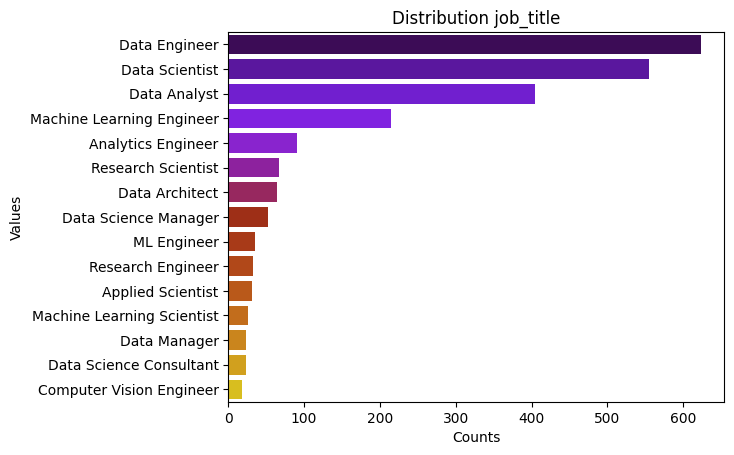

employee_residence
US    1900
GB     179
CA      88
IN      74
ES      54
DE      51
FR      40
PT      20
GR      20
BR      18
NL      16
AU      13
MX      11
PK       9
IE       8
Name: count, dtype: int64


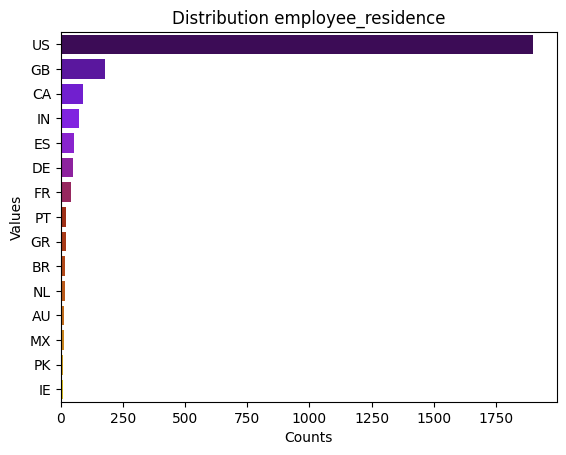

company_location
US    1936
GB     184
CA      90
DE      61
IN      61
ES      51
FR      35
GR      18
PT      16
AU      16
BR      15
NL      14
MX      11
IE       8
AT       7
Name: count, dtype: int64


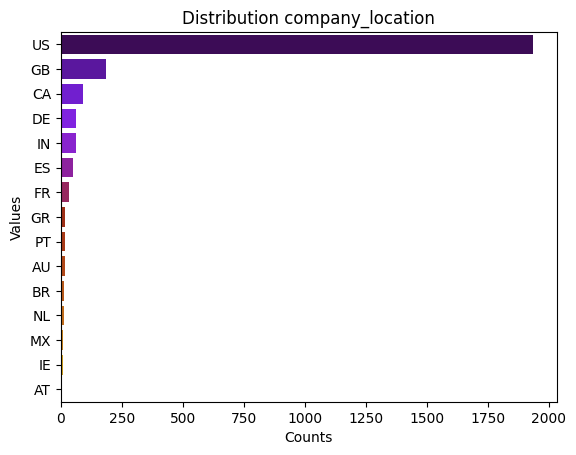

experience_level
Senior             1569
Mid_level           718
Entry_level         280
Executive_level     101
Name: count, dtype: int64


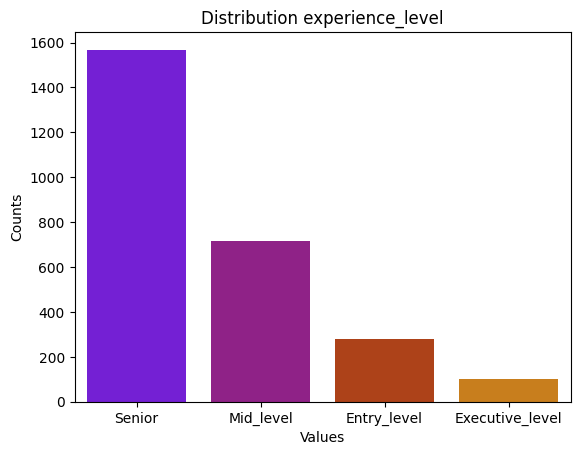

employment_type
Full_time      2629
Part_time        18
Contractual      11
Freelancer       10
Name: count, dtype: int64


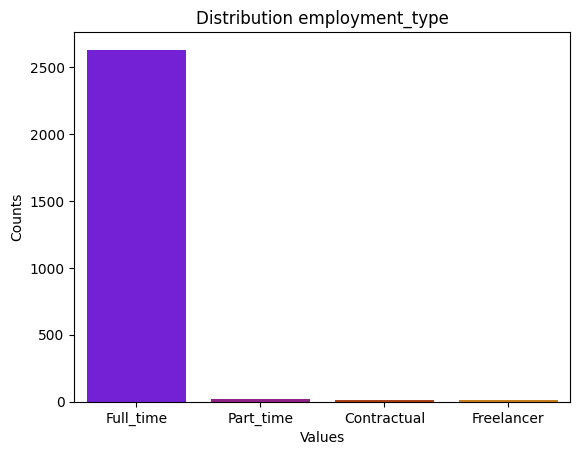

salary_currency
USD    2115
EUR     229
GBP     173
INR      63
CAD      32
AUD      11
PLN       6
BRL       6
SGD       6
CHF       5
JPY       3
DKK       3
HUF       3
TRY       3
MXN       2
Name: count, dtype: int64


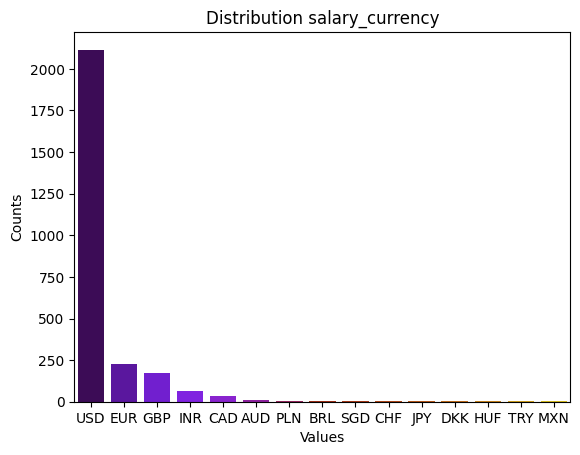

company_size
Medium    2084
Large      432
Small      152
Name: count, dtype: int64


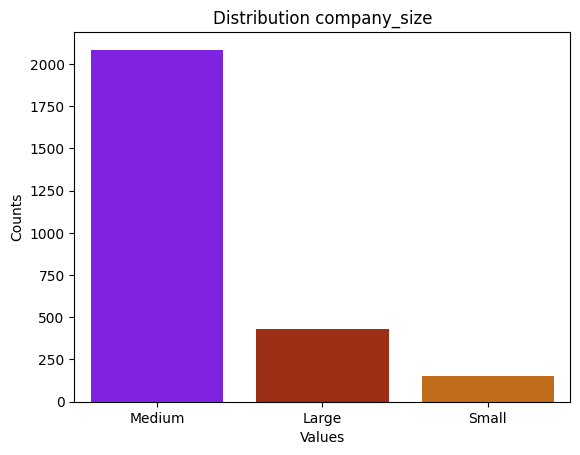

remote_ratio
Online          1260
Face-to-face    1212
Blended          196
Name: count, dtype: int64


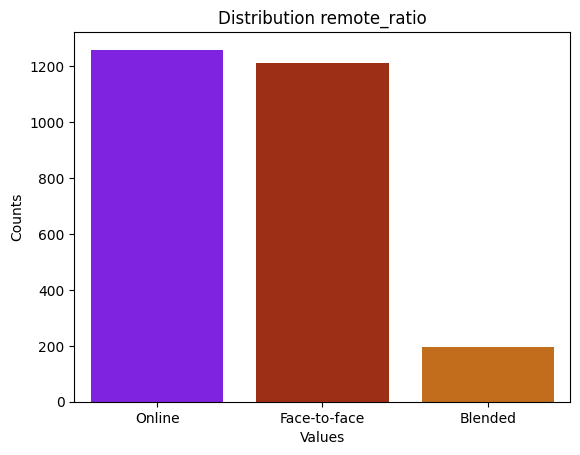

In [14]:
for v in categorical_vars_reverse:
    distribucio_variable(v, reverse = True)
for v in categorical_vars_non_reverse:
    distribucio_variable(v)

Distribució de variables numèriques:

work_year
2022    1196
2023    1156
2021     238
2020      78
Name: count, dtype: int64


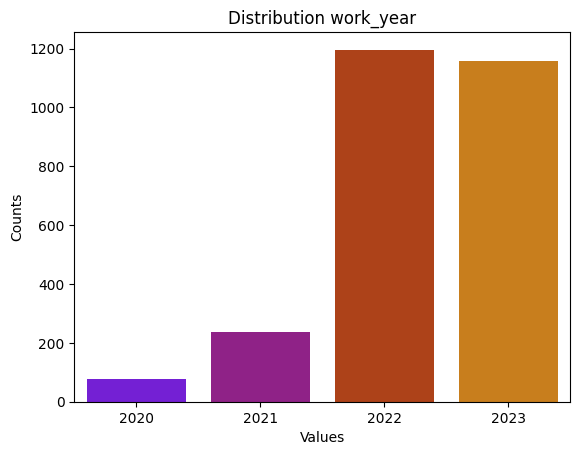

In [15]:
numeric_vars = list(df.select_dtypes(include=['int64']).columns)
numeric_vars_non_reverse = [v for v in numeric_vars if v != "salary"]
for v in numeric_vars_non_reverse:
    distribucio_variable(v)

Com podem observar en aquests histogrames hi ha atributs significativament representats davant d'altres, com poden ser:
- 'USD' a salary_currency
- 'US' a company_location
- 'US' a emplyee_residence
- 'full_time' a empoyment_type

Aquest desequilibri suggereix que les dades estan esbiaixades, ja que gran part de la població no estaria representada en aquestes dades. Això podria implicar que els models de regressió que construirem més endavant se sobreajustin a les dades dominants sense representar l'altra part de la població, dificultant la capacitat de generalitzar en els models, la qual cosa podria derivar en problemes d'overfitting.

### Salari mig

In [16]:
def average_salary_var(var, data = df, max_index = 15, reverse = False):
    average_salary = data.groupby(var)['salary'].mean()
    if len(average_salary) > max_index:
        average_salary = average_salary.head(max_index)
    average_salary = average_salary.sort_values(ascending=False)
    if reverse == True:
        sns.barplot(x=average_salary.values, y=average_salary.index,palette='gnuplot')
        plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
        plt.xlabel('Average salary')
        plt.ylabel('Values')
    else:
        sns.barplot(x=average_salary.index, y=average_salary.values,palette='gnuplot')
        plt.ylim(min(average_salary.values)-5000, max(average_salary.values)+1000)
        plt.xlabel('Values')
        plt.ylabel('Average salary')
    plt.title(f'Average salary {v}')
    plt.show()

Salari mig per a totes les variables:

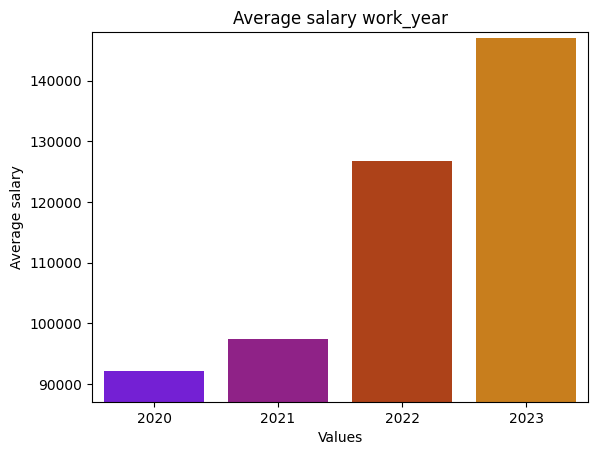

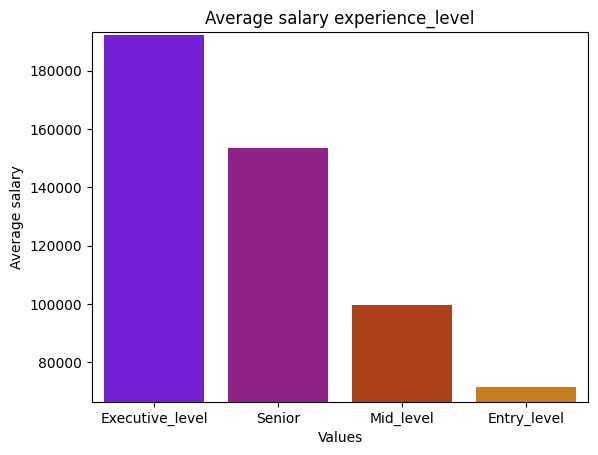

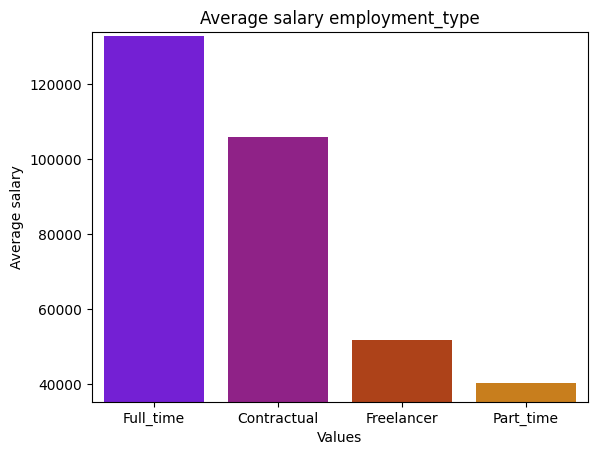

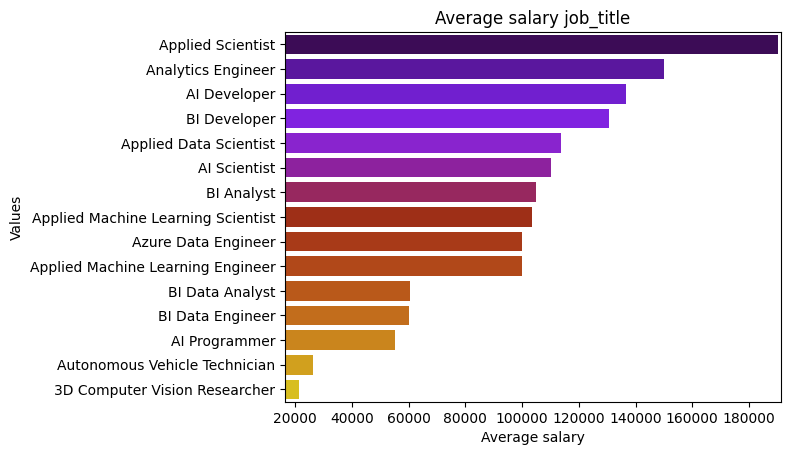

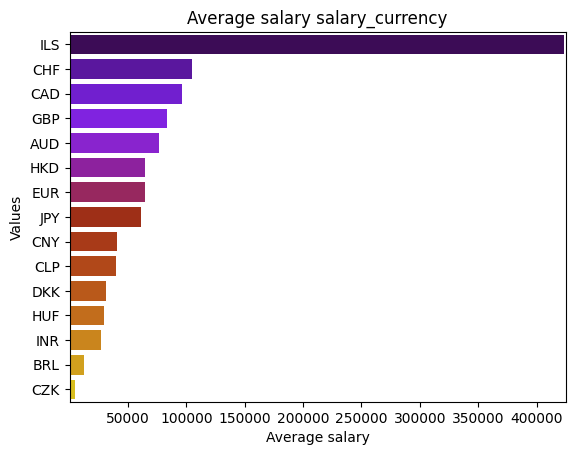

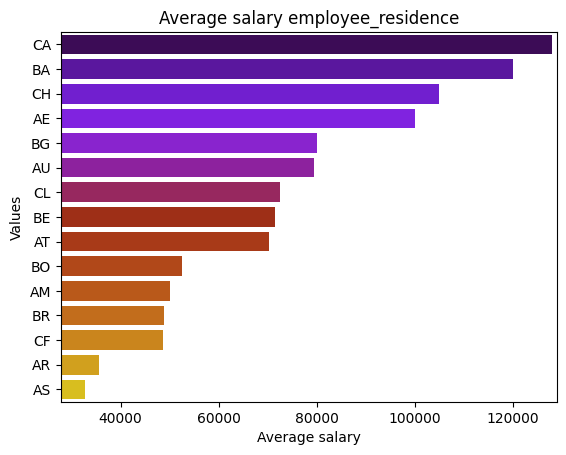

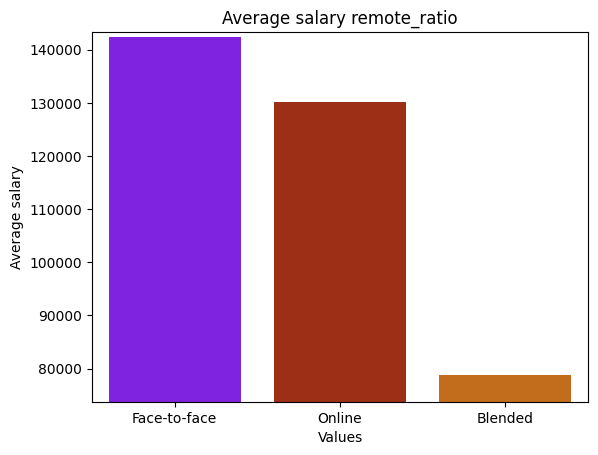

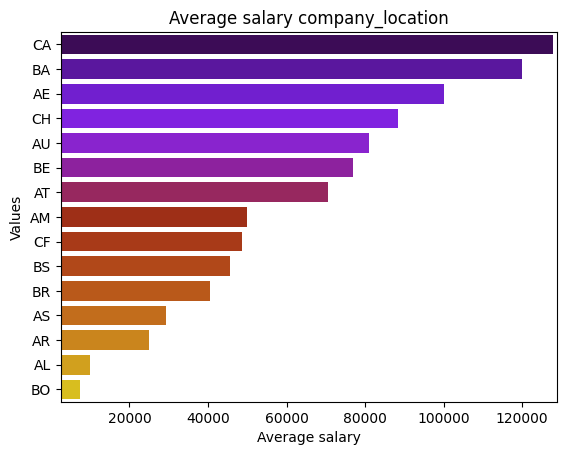

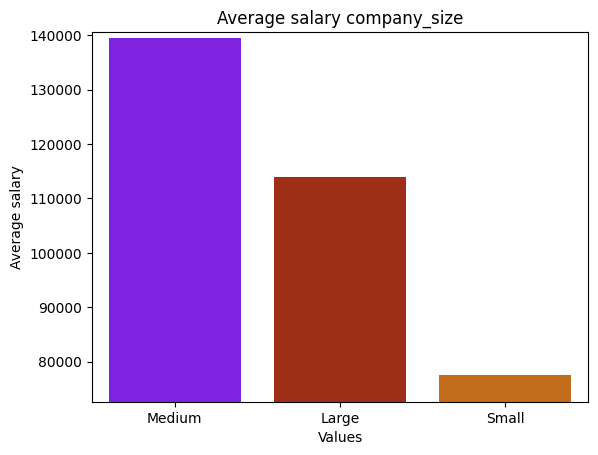

In [17]:
average_salary_vars = [v for v in df.columns if v != "salary"]
average_salary_vars_reverse = ["job_title", "salary_currency","employee_residence","company_location"]
for v in average_salary_vars:
    if v in average_salary_vars_reverse:
        average_salary_var(v, reverse = True)
    else:
        average_salary_var(v)

### $\textbf{TODO: SACAR CONCLUSIONES}$

### Dades categòriques a numèriques

Com que més endavant volem analitzar les característiques més importants per millorar el salari, hem decidit convertir les variables categòriques en numèriques utilitzant Label Encoding. Aquesta estratègia ens permet conservar el mateix nombre d'atributs, fent el procés més eficient i més visual, ja que més endavant quan volguem observar quines són les característiques més importants per millorar el teu salari amb One-Hot-Encoding seria més costós.

## TargetEncoding

In [231]:
df_label_econding = df.copy()
df_label_econding = df_label_econding.drop(["job_title"], axis=1)
df_label_econding = df_label_econding[df_label_econding['salary'] <= 140000]
for v in list(df_label_econding.select_dtypes(include=['object']).columns):
    mean_target = df_label_econding.groupby(v)['salary'].mean()
    df_label_econding[v] = df_label_econding[v].map(mean_target)

### Matriu de correlació

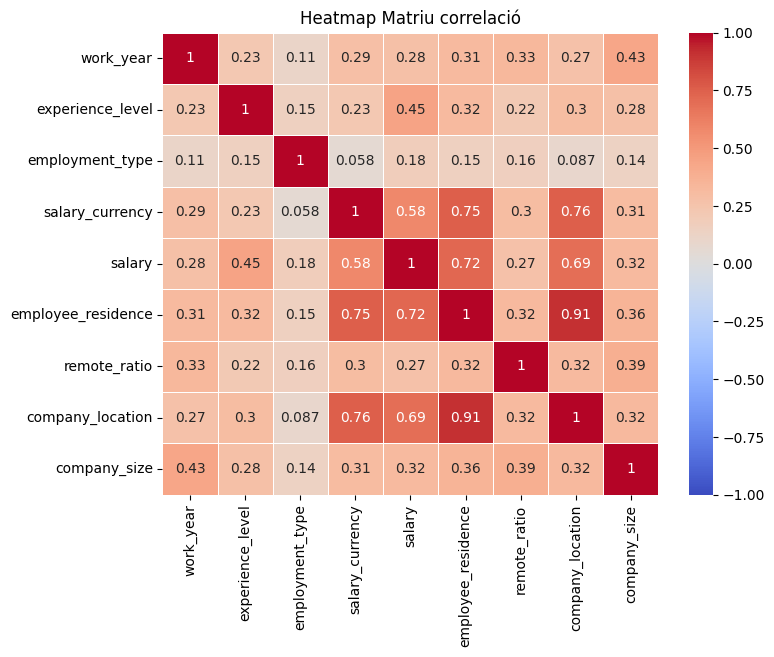

In [232]:
correlation_matrix = df_label_econding.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Heatmap Matriu correlació")
plt.show()

In [212]:
df_label_econding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1860 entries, 0 to 4341
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1860 non-null   int64  
 1   experience_level    1860 non-null   float64
 2   employment_type     1860 non-null   float64
 3   salary_currency     1860 non-null   float64
 4   salary              1860 non-null   int64  
 5   employee_residence  1860 non-null   float64
 6   remote_ratio        1860 non-null   float64
 7   company_location    1860 non-null   float64
 8   company_size        1860 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 145.3 KB


Com podem observar, hi ha una forta correlació entre el sou i algunes de les variables predictores, sent 0.55 la més alta amb la variable employee_residence. Aquesta correlació positiva indica que employee_residence podria tenir un impacte significatiu en la predicció del sou, cosa que ens ajudarà a construir models de regressió més robustos.

In [233]:
from sklearn.preprocessing import StandardScaler

target_att = 'salary'
attributes = [k for k in df_label_econding.keys() if k != target_att]
X = df_label_econding[attributes]
y = df_label_econding[[target_att]]
sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y)

In [234]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 48
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

In [235]:
def visualize_predictions(y_real, y_pred):
    plt.scatter(y_real, y_pred)
    plt.plot(y_real, y_real,'--',c = 'red')
    plt.xlabel('y_real')
    plt.ylabel('y_pred')
    plt.show()

    plt.scatter(y_real,y_pred-y_real)
    plt.xlabel('y_real')
    plt.ylabel('error')
    plt.show()

    plt.scatter(y_real,abs(y_pred-y_real))
    plt.xlabel('y_real')
    plt.ylabel('MAE')
    plt.show()


r2_train = 0.584137122667323 r2_test = 0.6015303133697019


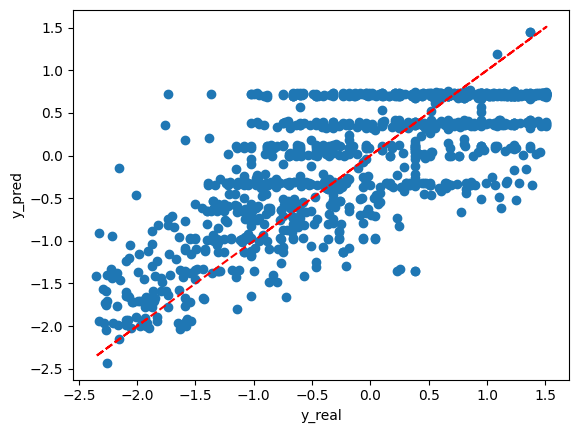

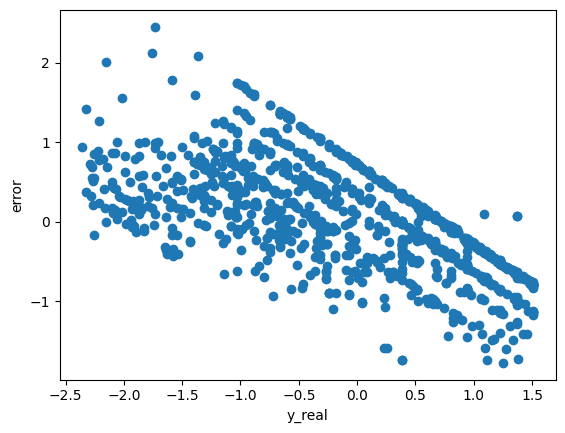

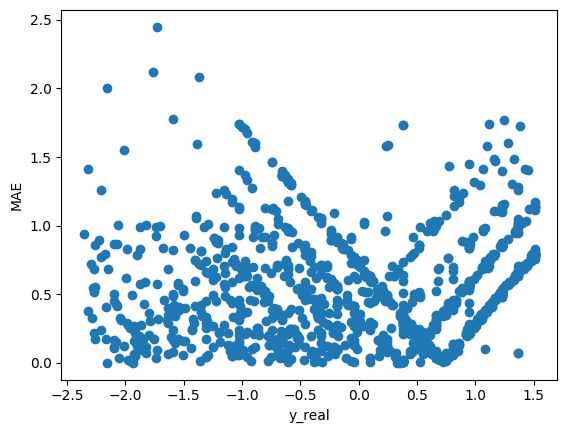

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")
visualize_predictions(y_train, y_pred_train)

r2_train = 0.7158164311414852 r2_test = 0.5849979160161604


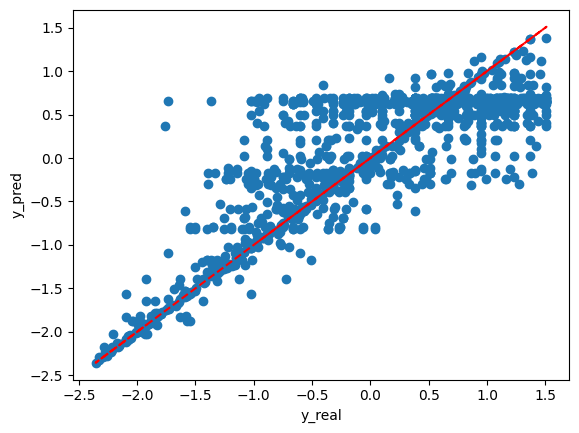

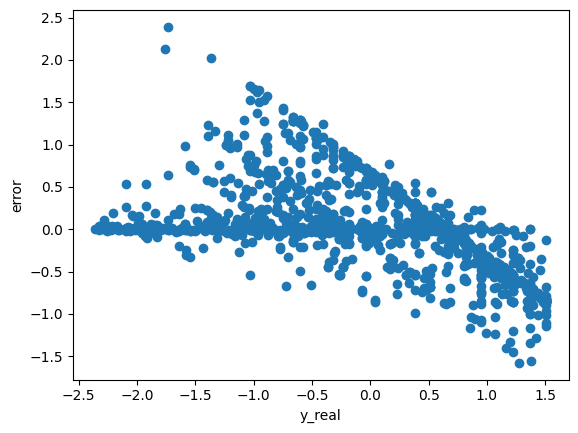

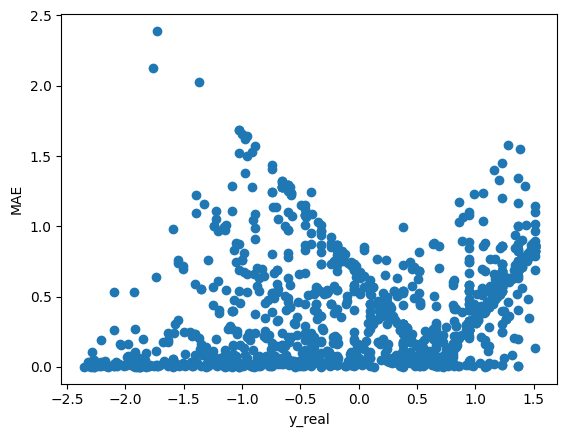

In [237]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=random_state)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")
visualize_predictions(y_train.flatten(), y_pred_train)

r2_train = 0.7023844303851768 r2_test = 0.6080884972158835


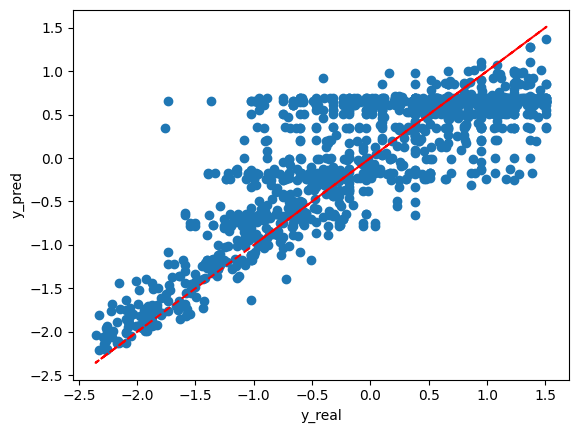

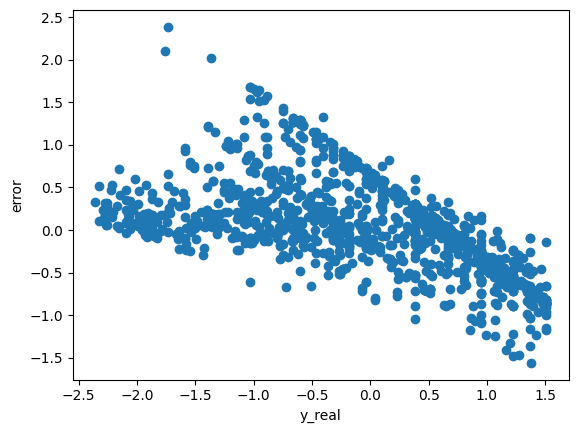

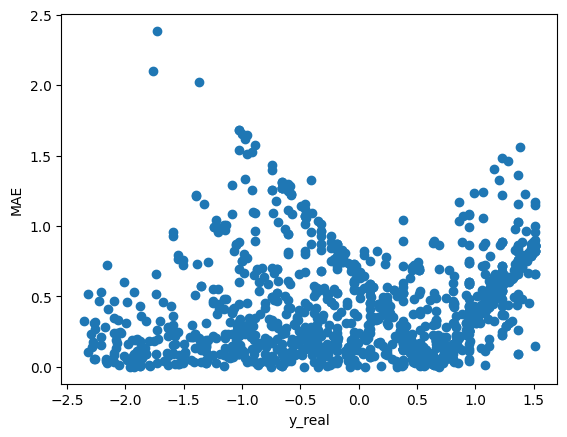

In [238]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")
visualize_predictions(y_train.flatten(), y_pred_train)

r2_train = 0.5760645381028644 r2_test = 0.5536947759485359


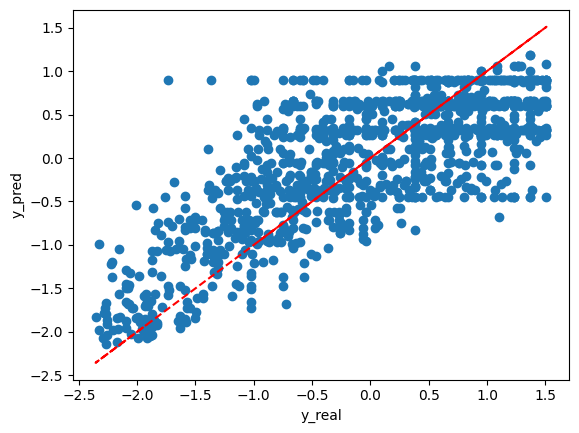

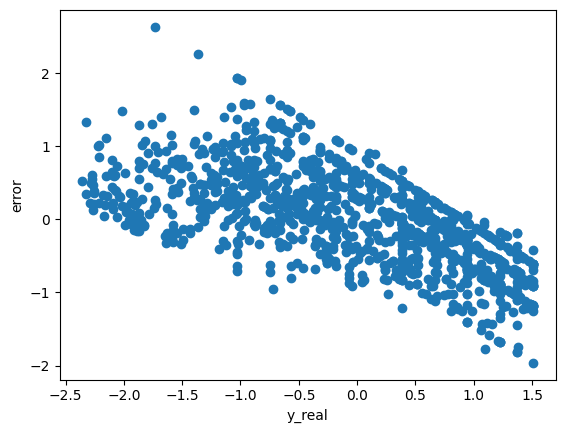

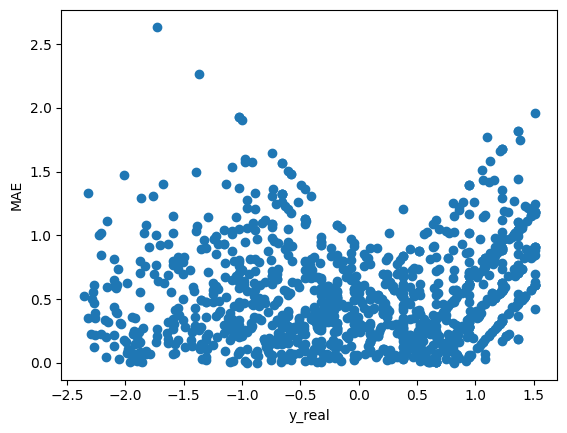

In [239]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

y_pred_train = knr.predict(X_train)
y_pred_test = knr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")
visualize_predictions(y_train, y_pred_train)

r2_train = 0.6395741726333635 r2_test = 0.6205787790799809


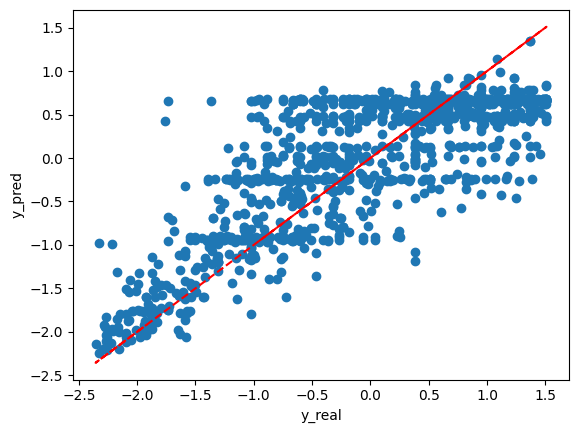

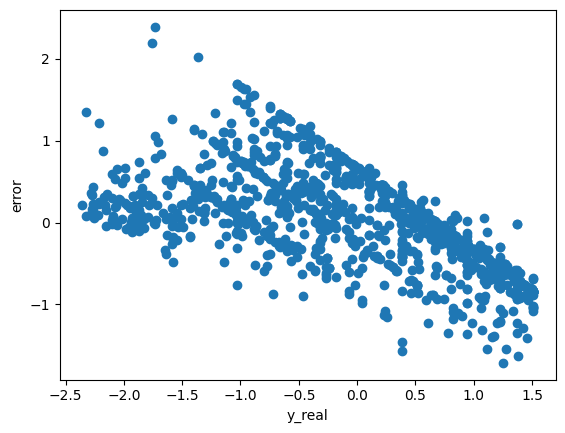

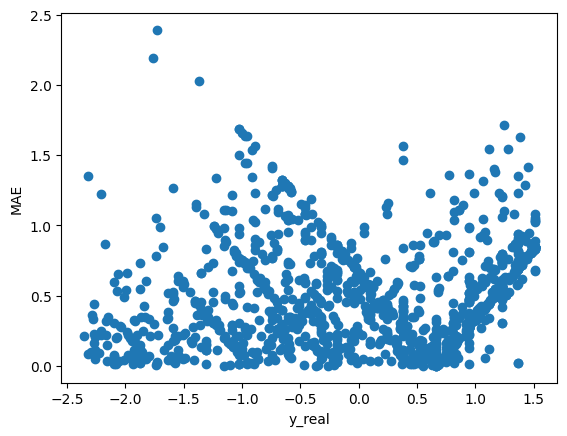

In [240]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = random_state)
gbr.fit(X_train, y_train)

y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")
visualize_predictions(y_train.flatten(), y_pred_train)

In [191]:
random_state = 50
regressors = {
    'XGB': XGBRegressor(random_state=random_state), 
    'Linear_Regression': LinearRegression(),
    'KN_Regressor': KNeighborsRegressor(),
    'GrandienBoosting_Regressor': GradientBoostingRegressor(),
    'RF_Regressor': RandomForestRegressor(random_state=random_state)
}

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

test_size = 0.2
random_state = 50

def select_important_features(model, data, threshold='mean'):
    y_norm, X_norm = data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    elif hasattr(model, 'coef_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    else:
        print(f" --- El model {model.__class__.__name__} no suporta selecció de característiques. S'afageixen totes les variables---")
        mask = np.ones(X_norm.shape[1], dtype=bool)
    X_norm_selected = X_norm[:, mask] if isinstance(X_norm, np.ndarray) else X_norm.loc[:, mask]
    return X_norm_selected, mask

In [193]:
selected_data = {}
for n1, model in regressors.items():
    print(f"Seleccionant característiques per model {n1}")
    X_selected, mask = select_important_features(model, [y_norm, X_norm])
    selected_data[n1] = X_selected
    selected_data[f'{n1}_mask'] = mask

Seleccionant característiques per model XGB
Seleccionant característiques per model Linear_Regression
Seleccionant característiques per model KN_Regressor
 --- El model KNeighborsRegressor no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques per model GrandienBoosting_Regressor
Seleccionant característiques per model RF_Regressor


In [194]:
from sklearn.metrics import r2_score

print("Metode Selected Features")
for n1 in regressors.keys():
    X_norm = selected_data[n1]

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

    model = regressors[f'{n1}']
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'Regressor {n1}: r2_train = {r2_train} i r2_test = {r2_test}')

Metode Selected Features
Regressor XGB: r2_train = 0.48515225174307663 i r2_test = 0.42516532143333363
Regressor Linear_Regression: r2_train = 0.5464944642428153 i r2_test = 0.548105677344624
Regressor KN_Regressor: r2_train = 0.5490901098859817 i r2_test = 0.504117880099201
Regressor GrandienBoosting_Regressor: r2_train = 0.4849379817802707 i r2_test = 0.4348250130358037
Regressor RF_Regressor: r2_train = 0.4847911326858826 i r2_test = 0.4337041588736156


In [195]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer

def hyperparameters_search(classifier, params, X_norm, y_norm, cv_splits=10, score='r2'):
    """
        classifier: model 
        param_grids: diccionari de parámetres per fer cerca dels millors
        data: X_norm
        y_data: y_norm
        cv_splits: splits pel kFols
    """
    kfold = KFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    
    if score == 'r2':
        scoring = make_scorer(r2_score)
    else:
        scoring = score  
    gs = GridSearchCV(estimator=classifier, param_grid=params, cv=kfold, scoring=scoring, n_jobs=-1)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=50)
    gs.fit(X_train, y_train)
    y_train_pred = gs.predict(X_train)
    y_test_pred = gs.predict(X_test)
    print(f"r2_train = {r2_score(y_train, y_train_pred)} r2_test = {r2_score(y_test, y_test_pred)}")

    return gs.best_params_

In [196]:
xgb_param_grid = {'min_child_weight': [1, 5, 10],
                  'gamma': [0.5, 1, 1.5, 2, 5],
                  'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.6, 0.8, 1.0],
                  'max_depth': [3, 4, 5]}
lr_param_grid = {'fit_intercept': [True, False],
                 'positive': [True, False]}
kn_param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                 'weights': ['uniform','distance'],
                 'p':[1,2,5]}
gr_param_grid = {'learning_rate': [0.01, 0.1, 0.2],
                 'n_estimators': [100, 200, 300],
                 'max_depth': [3, 5, 7]}
rf_param_grid = {'n_estimators' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                 'max_features': ["auto", "sqrt", "log2"],
                 'min_samples_split' : [2,4,8],
                 'bootstrap': [True, False],
            }

params_grid = {'XGB':xgb_param_grid,
               'Linear_Regression':lr_param_grid,
               'KN_Regressor':kn_param_grid,
               'GrandienBoosting_Regressor':gr_param_grid,
               'RF_Regressor':rf_param_grid}

In [197]:
for n1 in regressors.keys():
    X_norm = selected_data[n1]
    model = regressors[n1]
    print(f'Dataset selected_features i regressor {n1}:')
    best_params = hyperparameters_search(model, params_grid[n1], X_norm, y_norm)

Dataset selected_features i regressor XGB:
r2_train = 0.4783228992978037 r2_test = 0.46071545837231276
Dataset selected_features i regressor Linear_Regression:
r2_train = 0.5464939765964671 r2_test = 0.5481135071307467
Dataset selected_features i regressor KN_Regressor:
r2_train = 0.6319720763294192 r2_test = 0.5440644745577358
Dataset selected_features i regressor GrandienBoosting_Regressor:
r2_train = 0.48170684202654557 r2_test = 0.4556594552641432
Dataset selected_features i regressor RF_Regressor:
r2_train = 0.4832794019877291 r2_test = 0.43547290600641897


In [35]:
def filter_data(data, min_count, exclude_col='salary'):
    # Filtramos las columnas, excluyendo 'salary'
    columns_to_check = [col for col in data.columns if col != exclude_col]
    
    # Para cada fila, verificamos si cada valor en las columnas seleccionadas cumple con la condición
    rows_to_keep = data.apply(
        lambda row: all(data[col].value_counts().get(row[col], 0) >= min_count for col in columns_to_check),
        axis=1
    )
    
    # Retornamos solo las filas que cumplen con la condición
    return data[rows_to_keep]

In [128]:
df_filt = filter_data(df.copy(), 20)
for v in list(df_filt.select_dtypes(include=['object']).columns):
    mean_target = df_filt.groupby(v)['salary'].mean()
    df_filt[v] = df_filt[v].map(mean_target)
df_filt

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
3,2023,157389.281392,140882.088954,138293.900200,152843.402168,175000,127965.540984,140182.869936,129530.612903,144980.925568
4,2023,157389.281392,140882.088954,138293.900200,152843.402168,120000,127965.540984,140182.869936,129530.612903,144980.925568
5,2023,157389.281392,140882.088954,190342.580645,152843.402168,222200,153507.604997,146106.242954,153143.497333,123657.526087
6,2023,157389.281392,140882.088954,190342.580645,152843.402168,136000,153507.604997,146106.242954,153143.497333,123657.526087
7,2023,157389.281392,140882.088954,138293.900200,152843.402168,219000,127965.540984,146106.242954,129530.612903,144980.925568
...,...,...,...,...,...,...,...,...,...,...
4254,2022,81791.509317,140882.088954,138293.900200,81259.866667,52396,127965.540984,140182.869936,129530.612903,123657.526087
4272,2022,109679.664659,140882.088954,143488.415652,61563.934783,68147,61808.870968,140182.869936,65555.185185,144980.925568
4275,2022,109679.664659,140882.088954,138293.900200,81259.866667,69336,127965.540984,140182.869936,129530.612903,144980.925568
4322,2022,109679.664659,140882.088954,108530.128342,83600.166667,65438,85902.358491,146106.242954,85917.068750,144980.925568


In [241]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full_time,Principal Data Scientist,EUR,85847,ES,Online,ES,Large
1,2023,Mid_level,Contractual,ML Engineer,USD,30000,US,Online,US,Small
2,2023,Mid_level,Contractual,ML Engineer,USD,25500,US,Online,US,Small
3,2023,Senior,Full_time,Data Scientist,USD,175000,CA,Online,CA,Medium
4,2023,Senior,Full_time,Data Scientist,USD,120000,CA,Online,CA,Medium
...,...,...,...,...,...,...,...,...,...,...
4272,2022,Mid_level,Full_time,Data Engineer,EUR,68147,FR,Online,FR,Medium
4273,2022,Mid_level,Full_time,Data Scientist,CHF,122346,CH,Face-to-face,CH,Large
4275,2022,Mid_level,Full_time,Data Scientist,CAD,69336,CA,Online,CA,Medium
4322,2022,Mid_level,Full_time,Data Analyst,GBP,65438,GB,Face-to-face,GB,Medium


In [246]:
def model_score (model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return r2_train, r2_test

In [247]:
def all_methods(data):
    target_att = 'salary'
    attributes = [k for k in data.keys() if k != target_att]
    X = data[attributes]
    y = data[[target_att]]
    sc = StandardScaler()
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)
    test_size = 0.2
    random_state = 50

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

    regressors = {
        'XGB': XGBRegressor(random_state=random_state), 
        'Linear_Regression': LinearRegression(),
        'KN_Regressor': KNeighborsRegressor(),
        'GrandienBoosting_Regressor': GradientBoostingRegressor(),
        'RF_Regressor': RandomForestRegressor(random_state=random_state)
    }

    r2_train_scores = {'XGB': [], 'Linear_Regression': [], 'KN_Regressor': [], 'GrandienBoosting_Regressor': [], 'RF_Regressor': []}
    r2_test_scores = {'XGB': [], 'Linear_Regression': [], 'KN_Regressor': [], 'GrandienBoosting_Regressor': [], 'RF_Regressor': []}

    for n1, model in regressors.items():
        r2_train, r2_test = model_score(model, X_train, X_test, y_train, y_test)
        r2_train_scores[n1].append(r2_train)
        r2_test_scores[n1].append(r2_test)
    return r2_train_scores, r2_test_scores
    

In [ ]:
values = np.arange(200000, 99999, -5000)
for val_max in values:
    df_label_econding = df.copy()
    df_label_econding = df_label_econding.drop(["job_title"], axis=1)
    df_label_econding = df_label_econding[df_label_econding['salary'] <= val_max]
    for v in list(df_label_econding.select_dtypes(include=['object']).columns):
        mean_target = df_label_econding.groupby(v)['salary'].mean()
        df_label_econding[v] = df_label_econding[v].map(mean_target)
    r2_train_scores, r2_test_scores = all_methods(df_label_econding)

    # Graficar histogramas para cada modelo
    plt.figure(figsize=(15, 8))
    model_names = list(r2_train_scores.keys())
    for i, model in enumerate(model_names):
        plt.subplot(2, 3, i+1)
        plt.hist(r2_train_scores[model], bins=10, alpha=0.7, label=f'{model} (train)', color='blue')
        plt.hist(r2_test_scores[model], bins=10, alpha=0.7, label=f'{model} (test)', color='red')
        plt.title(f"Histograma R2 para {model}")
        plt.xlabel("R2 Score")
        plt.ylabel("Frecuencia")
        plt.legend()
    plt.tight_layout()
    plt.show()
    

Max_salary = 200000
Max_salary = 195000
Max_salary = 190000
Max_salary = 185000
Max_salary = 180000
Max_salary = 175000
Max_salary = 170000
Max_salary = 165000
Max_salary = 160000
Max_salary = 155000
Max_salary = 150000
Max_salary = 145000
Max_salary = 140000
Max_salary = 135000
Max_salary = 130000
Max_salary = 125000
Max_salary = 120000
Max_salary = 115000
Max_salary = 110000
Max_salary = 105000
Max_salary = 100000


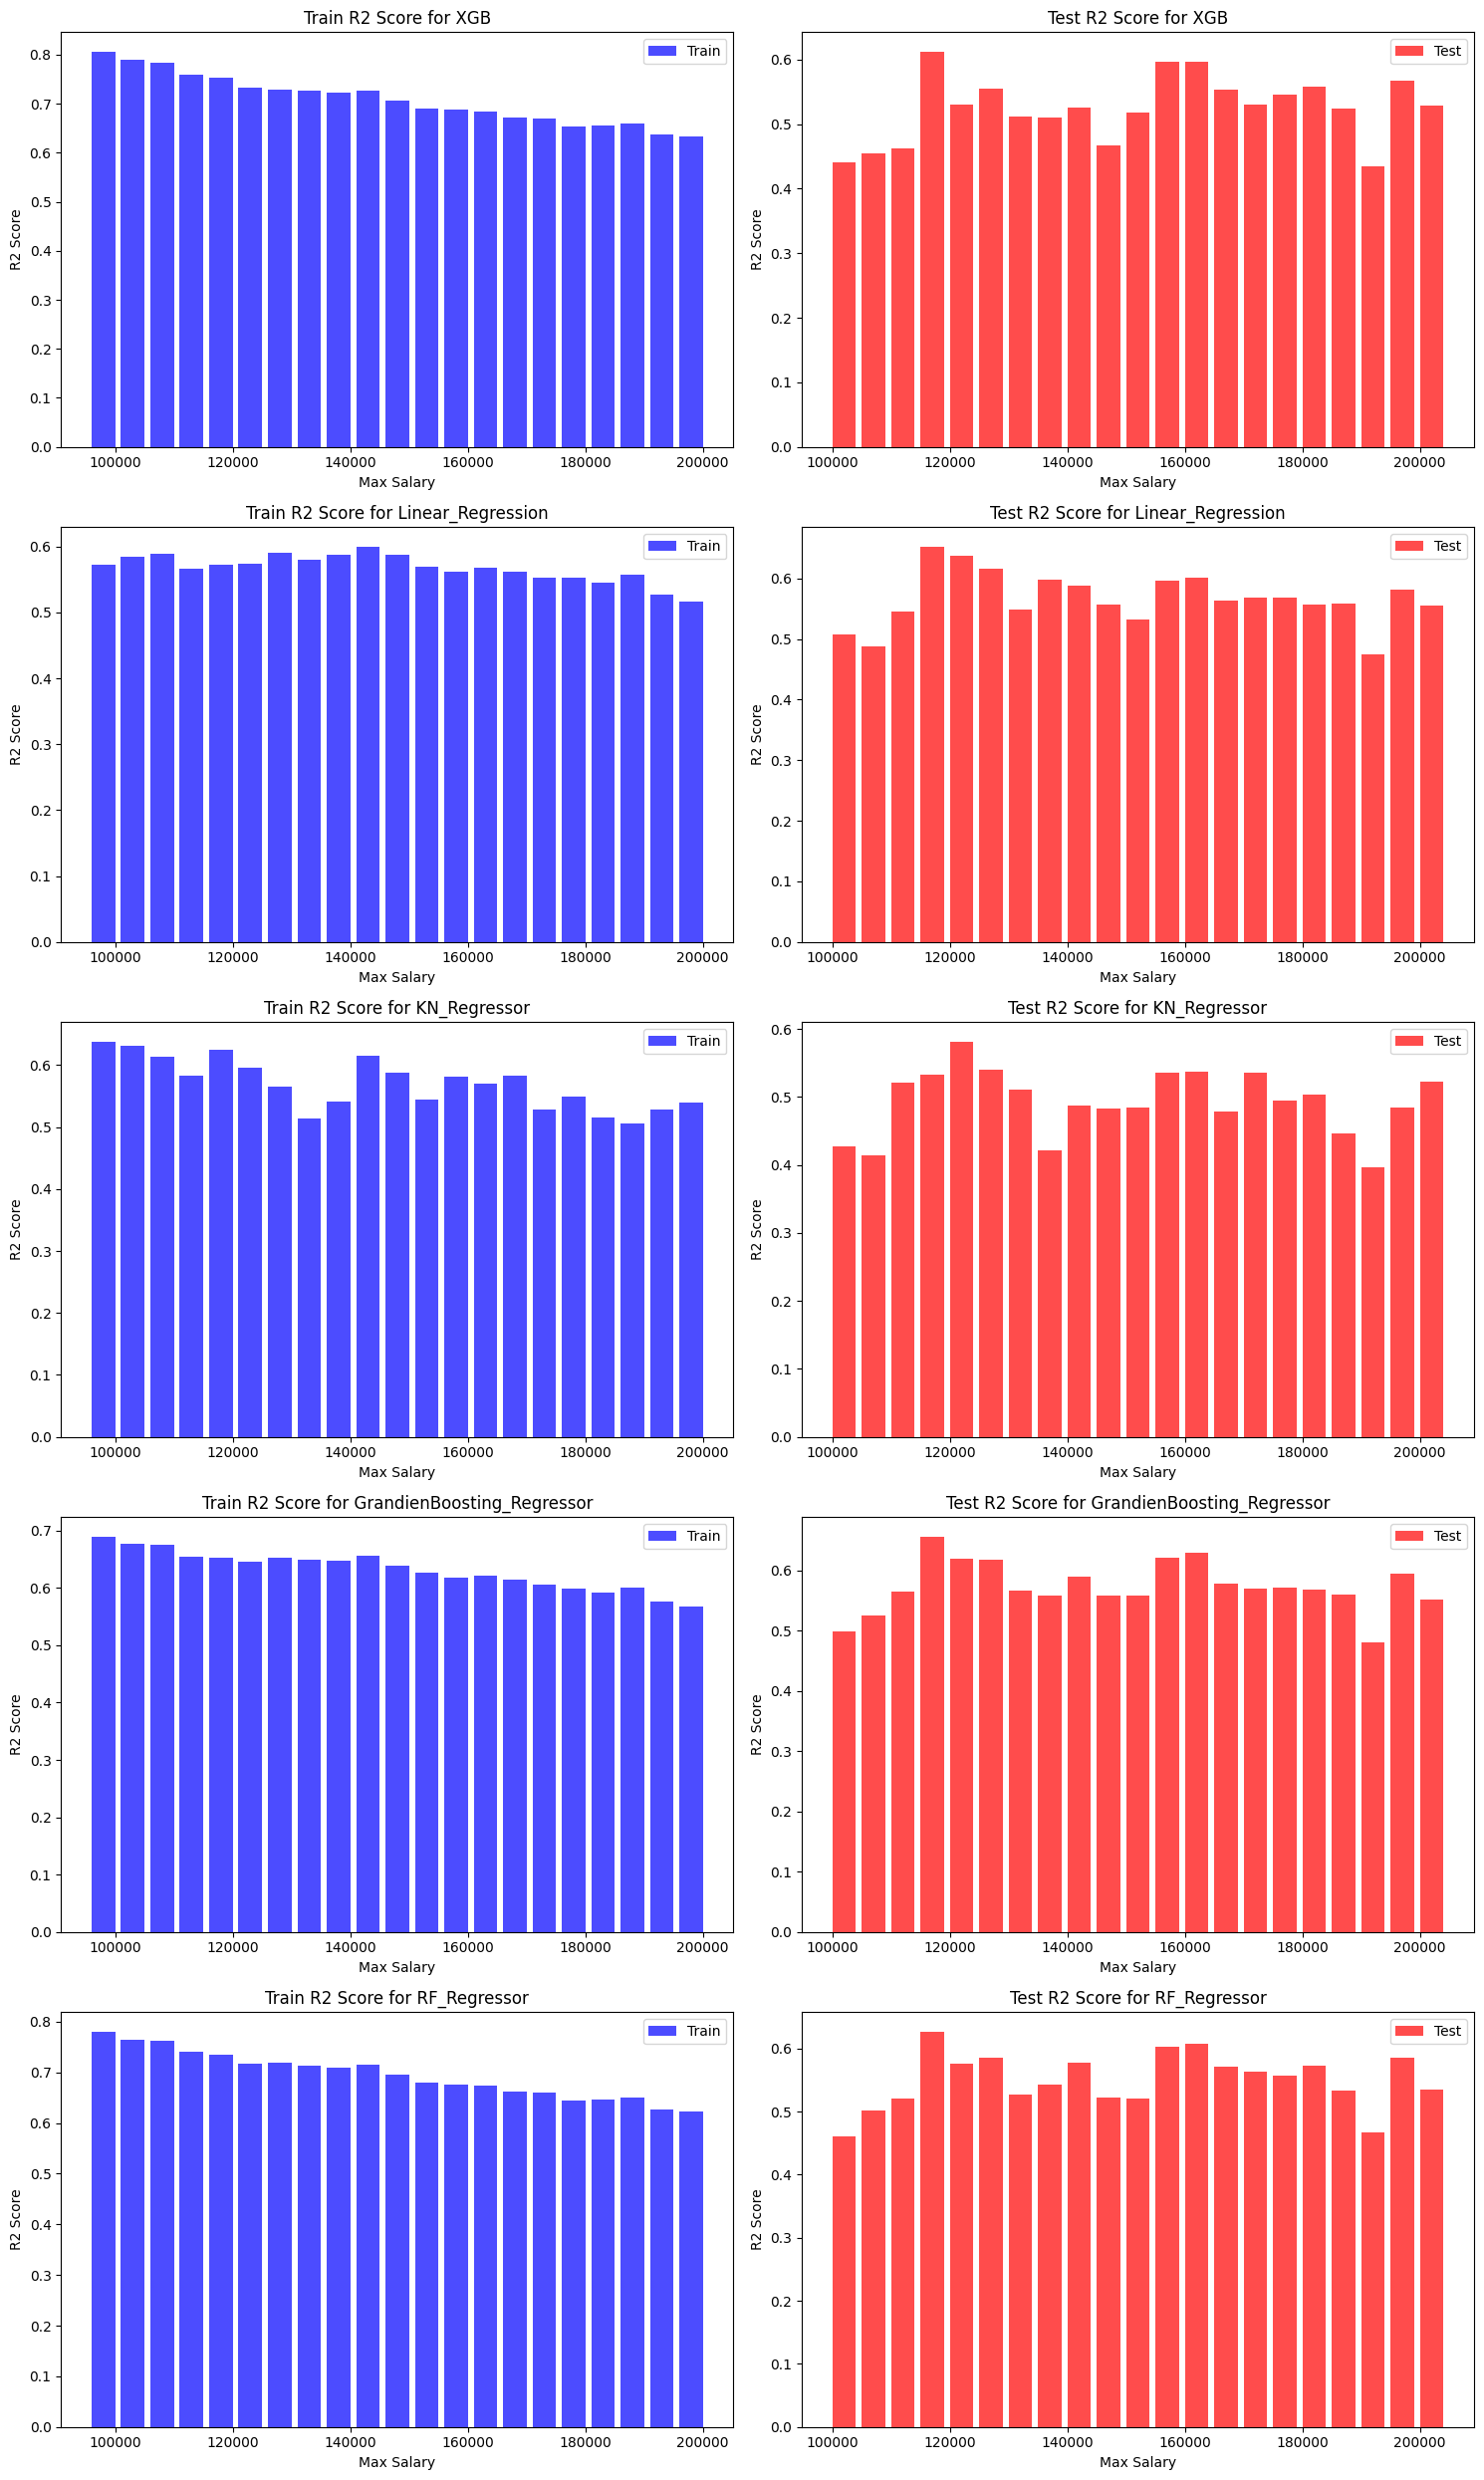

In [253]:
values = np.arange(200000, 99999, -5000)

# Inicializar diccionarios para guardar los R2 de cada modelo
r2_train_all = {'XGB': [], 'Linear_Regression': [], 'KN_Regressor': [], 'GrandienBoosting_Regressor': [], 'RF_Regressor': []}
r2_test_all = {'XGB': [], 'Linear_Regression': [], 'KN_Regressor': [], 'GrandienBoosting_Regressor': [], 'RF_Regressor': []}

for val_max in values:
    df_label_econding = df.copy()
    df_label_econding = df_label_econding.drop(["job_title"], axis=1)
    df_label_econding = df_label_econding[df_label_econding['salary'] <= val_max]
    
    for v in list(df_label_econding.select_dtypes(include=['object']).columns):
        mean_target = df_label_econding.groupby(v)['salary'].mean()
        df_label_econding[v] = df_label_econding[v].map(mean_target)
    
    print(f"Max_salary = {val_max}")
    r2_train_scores, r2_test_scores = all_methods(df_label_econding)

    for model_name in r2_train_scores.keys():
        r2_train_all[model_name].append(r2_train_scores[model_name][0])
        r2_test_all[model_name].append(r2_test_scores[model_name][0])

# Graficar histogramas para cada modelo
fig, axes = plt.subplots(len(r2_train_all), 2, figsize=(15, 5 * len(r2_train_all)))  # Dos columnas, una para train y otra para test

# Crear un gráfico para cada modelo
for i, model in enumerate(r2_train_all.keys()):
    # Histograma del conjunto de entrenamiento
    axes[i, 0].bar(values - 2000, r2_train_all[model], width=4000, label='Train', color='blue', alpha=0.7)
    axes[i, 0].set_title(f"Train R2 Score for {model}")
    axes[i, 0].set_xlabel("Max Salary")
    axes[i, 0].set_ylabel("R2 Score")
    axes[i, 0].legend()

    # Histograma del conjunto de prueba
    axes[i, 1].bar(values + 2000, r2_test_all[model], width=4000, label='Test', color='red', alpha=0.7)
    axes[i, 1].set_title(f"Test R2 Score for {model}")
    axes[i, 1].set_xlabel("Max Salary")
    axes[i, 1].set_ylabel("R2 Score")
    axes[i, 1].legend()

# Ajustar la disposición y mostrar el gráfico
plt.tight_layout()
plt.show()
